In [1]:
import math
import random
import copy
import matplotlib.pyplot as plt

In [2]:
totalPopulation=100
totalCities=30
totalTour=totalCities+1
iteration=50
mutationRate=0.1
population=[]
cities=[]
exeCost=None
fitnessRecord=[]
minIndex=None
# shortestPath=None
costChanges=[]
recordDistance = 99999999999999
bestEver=[]
currentBest=None

In [3]:
tour=[[0 for j in range(totalTour)] for i in range(totalTour)]
distanceMatrix=[[0 for j in range(totalCities)] for i in range(totalCities)]
#fitness=[0 for j in range(totalPopulation)]
ParentA=[]
ParentB=[]

In [4]:

def generateFirstGeneration():
    for _ in range(1,totalPopulation+1):
        generateChromosome()
    generateVectors()
    
       

In [5]:
def generateChromosome():
    path=[]
    for _ in range(1,totalCities+1):
#        print("hi")
        randomNo=random.randint(1,totalCities)
        while(alreadyExist(path,randomNo)):
            randomNo=random.randint(1,totalCities)
        path.append(randomNo)
  
    population.append(path)


In [6]:
def alreadyExist(path,number):
    for i in path:
        if i==number:
            return True
    return False

In [7]:
def generateVectors():
    for i in range(1,totalCities+1):
        vector=[0 for x in range(2)]
        vector[0]= random.randint(1,1000)
        vector[0] = round(vector[0],8)
        vector[1]= random.randint(1,1000)
        vector[1]= round(vector[1],8)
        cities.append(vector)

In [8]:
def completeTour():
    global tour
    tour=copy.deepcopy(population)
    for x in tour:
        first=x[0]
        x.append(first)

In [9]:
def fitnessFunction():
    global distanceMatrix
    for i in range(totalCities):
        for j in range(totalCities):
            distanceMatrix[i][j]=round(math.sqrt(((cities[i][0]-cities[j][0])**2)+((cities[i][1]-cities[j][1])**2)),8)


In [10]:
def findShortestPath(fitnessArr):
    global recordDistance
    global bestEver
    currentRecord = 9999999999999999999
    for i in range(totalPopulation):
        if (fitnessArr[i] < recordDistance):
            recordDistance = fitnessArr[i]
            bestEver = population[i]
        if (fitnessArr[i] < currentRecord):
            currentRecord = fitnessArr[i]
            currentBest = population[i]

In [11]:
def CalculateFitness():
    global fitnessRecord
    global fitness
    fitness=[0 for j in range(totalPopulation)]
    fitnessRecord=[]
    fitnessFunction()
#     print(distanceMatrix)
    for i in range(totalPopulation):
        for j in range(len(population[i])):
            first=tour[i][j]
            first=first-1
            second=tour[i][j+1]
            second=second-1
            fitness[i] +=distanceMatrix[first][second]
        fitnessRecord.append(round(fitness[i],8))
        fitness[i] =round (((1.00000000000 / pow(fitness[i], 8) )+ 1.00000000000),8)
#         print("index ", i, "fitness",round(fitness[i],8))
    findShortestPath(fitnessRecord)
    return fitness

In [12]:
def normalizeFitness(fitness):
#     global fitness
#     print("ffitness",ffitness)
#     print("\nfitness",fitness)
    sum = 0.0;
    for i in range(totalPopulation):
        sum += fitness[i]
#     print(sum)
    for j in range(totalPopulation):
        fitness[j] = round((fitness[j] / sum),8) 
    return fitness

In [13]:
def pickOne(fitness):
    index = 0
    r=round(random.uniform(0, 1),8)
#     print(r)
    while (r > 0 and index < totalPopulation):
#         temp=r
        r = r - fitness[index]
        index+=1
    index-=1
#     print(temp)
#     print(index)
    return population[index]
# pickOne()

In [14]:
def crossOver(ParentA,ParentB):
#     newChild=[]
    start=random.randint(0,totalCities-1)
    if(start==totalCities-1):
        end=random.randint(start,totalCities-1)
    else:
        end=random.randint(start+1,totalCities-1)
    newChild=ParentA[start:end+1]
    #left = totalCities - len(newChild)
    for k in range(totalCities):
        city=ParentB[k]
        if not city in newChild:
            newChild.append(city)
    return newChild

In [15]:
def swap(child,indexA,indexB):
    temp=child[indexA]
    child[indexA]=child[indexB]
    child[indexB]=temp
    return child


def mutate(child,mutationRate):
    for i in range(totalCities):
        z=round(random.uniform(0,1),2)
#         print(z)
        if z < mutationRate:
            indexA = random.randint(0,totalCities-1)
            indexB = (indexA+1) % totalCities
            child=swap(child,indexA,indexB)
    return child

In [16]:
def SelectNextGeneration(fitness):
#     print(fitness)
    global population
#    print(population)
    newPopulation=[]
    global ParentA
    global ParentB
    global select
# select=round((totalPopulation/2))
    for i in range(totalPopulation):
#         print(i)
        ParentA=pickOne(fitness)
        ParentB=pickOne(fitness)
#         print(ParentA)
#         print(ParentB)
        child = crossOver(ParentA, ParentB)
#     print("childBefore",child)
        child=mutate(child, mutationRate)
#     print("childAfter",child)
        newPopulation.append(child)
    population = newPopulation
# print("\n\n" ,population)

In [17]:
generateFirstGeneration()
completeTour()


Population Size 100

Number of iterations 50

Total cities 30

Shortest Path [30, 4, 11, 20, 6, 21, 10, 3, 19, 15, 1, 29, 24, 16, 18, 22, 12, 14, 8, 28, 17, 23, 26, 2, 7, 25, 13, 27, 9, 5]

Fitness Value 9818.40472841


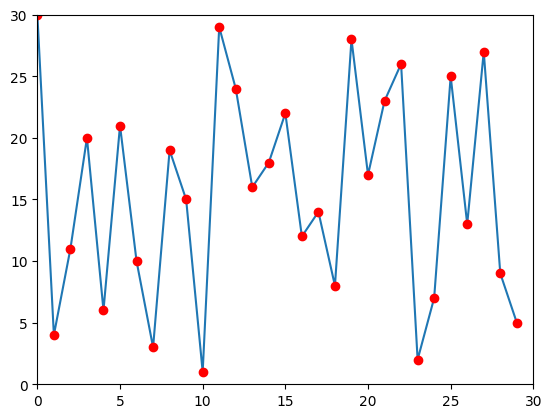

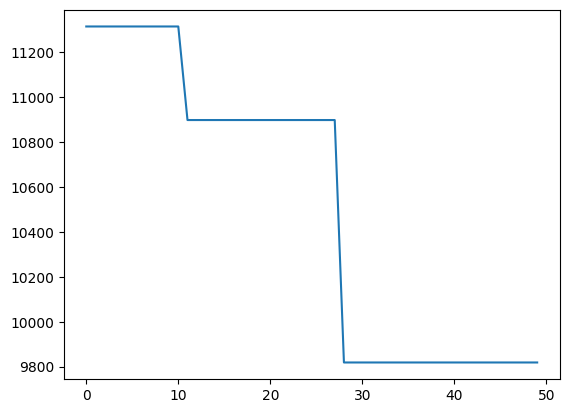

In [18]:
def main():
    global costChanges
    global fitness
    for i in range(iteration):
        fitness=CalculateFitness()
        costChanges.append(recordDistance)
#         print(fitness)
        fitness=normalizeFitness(fitness)
#         print(fitness)
        SelectNextGeneration(fitness)
        completeTour()
    fitness=CalculateFitness()
    print("\nPopulation Size",totalPopulation)
    print("\nNumber of iterations",iteration)
    print("\nTotal cities",totalCities)
    print("\nShortest Path",bestEver)
    print("\nFitness Value",recordDistance)
   
    
    
    plt.plot(bestEver)
    plt.plot(bestEver,'ro')
    plt.axis([0,totalCities,0,totalCities])
    plt.show()
    
    plt.plot(costChanges)
    plt.show()
    
main()
